In [8]:
## animate Electric field

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import os
from ReadBinary import *

indStart = 0

Ey = GetArrays("../data/2D/E-y.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Ez = GetArrays("../data/2D/E-z.data", indStart=indStart, indEnd=None)[:, 0, :, :]
#Hx = GetArrays("../data/2D/H-x.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Wp2 = GetArrays("../data/2D/Wp2.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Jdy = GetArrays("../data/2D/J-metal-y.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Jdz = GetArrays("../data/2D/J-metal-z.data", indStart=indStart, indEnd=None)[:, 0, :, :]
rho = GetArrays("../data/2D/rho.data", indStart=indStart, indEnd=None)[:, 0, :, :]

Jey = GetArrays("../data/2D/Je-y.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Jez = GetArrays("../data/2D/Je-z.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Jhy = GetArrays("../data/2D/Jh-y.data", indStart=indStart, indEnd=None)[:, 0, :, :]
Jhz = GetArrays("../data/2D/Jh-z.data", indStart=indStart, indEnd=None)[:, 0, :, :]

EmitterMask = GetArrays("../data/2D/EmitterMask.data", indStart=indStart, indEnd=None)[:, 0, :, :]

print("shape Ey: {}, max: {:.3e} , min: {:.3e}".format(Ey.shape, np.max(Ey), np.min(Ey)))
print("shape Ez: {}, max: {:.3e} , min: {:.3e}".format(Ez.shape, np.max(Ez), np.min(Ez)))

print("max Jey: {:.3e}".format(np.max(np.abs(Jey))))
print("max Jez: {:.3e}".format(np.max(np.abs(Jez))))

show_pml = False

Ey_pml_r = None
Ez_pml_r = None
Ey_pml_l = None
Ez_pml_l = None
Ey_pml_t = None
Ez_pml_t = None
Ey_pml_b = None
Ez_pml_b = None
if show_pml:
    if os.path.exists("../data/2D/E-pml-r-y.data"):
        Ey_pml_r = GetArrays("../data/2D/E-pml-r-y.data", indStart=0, indEnd=None)[:, 0, :, :]
    if os.path.exists("../data/2D/E-pml-r-z.data"):
        Ez_pml_r = GetArrays("../data/2D/E-pml-r-z.data", indStart=0, indEnd=None)[:, 0, :, :]
    if os.path.exists("../data/2D/E-pml-l-y.data"):
        Ey_pml_l = GetArrays("../data/2D/E-pml-l-y.data", indStart=0, indEnd=None)[:, 0, :, :]
    if os.path.exists("../data/2D/E-pml-l-z.data"):
        Ez_pml_l = GetArrays("../data/2D/E-pml-l-z.data", indStart=0, indEnd=None)[:, 0, :, :]
    ey_nz = Ey.shape[2]
    ez_nz = Ez.shape[2]
    Ey = np.concatenate((Ey_pml_l[:, :,:-1], Ey[:, :,:-1], Ey_pml_r[:, :,:]), axis=-1)
    Ez = np.concatenate((Ez_pml_l[:, :,:], Ez[:, :,:], Ez_pml_r[:, :,:]), axis=-1)

    if os.path.exists("../data/2D/E-pml-t-y.data"):
        Ey_pml_t = GetArrays("../data/2D/E-pml-t-y.data", indStart=0, indEnd=None)[:, 0, :, :]
        pml_t_nt, pml_t_ny, pml_t_nz = Ey_pml_t.shape

        nz_right = int((Ey.shape[2] - ey_nz) / 2)
        Ey_pml_tr = np.zeros((pml_t_nt, pml_t_ny, nz_right))
        if os.path.exists("../data/2D/E-pml-tr-y.data"):
            Ey_pml_tr = GetArrays("../data/2D/E-pml-tr-y.data", indStart=0, indEnd=None)[:, 0, :, :]
            nz_right = Ey_pml_tr.shape[2]
            print("Ey_pml_tr loaded!")

        nz_left = Ey.shape[2] - ey_nz - nz_right + 1
        Ey_pml_tl = np.zeros((pml_t_nt, pml_t_ny, nz_left))
        if os.path.exists("../data/2D/E-pml-tl-y.data"):
            Ey_pml_tl = GetArrays("../data/2D/E-pml-tl-y.data", indStart=0, indEnd=None)[:, 0, :, :-1]
            nz_left = Ey_pml_tl.shape[2]
            print("Ey_pml_tl loaded!")

        Ey_pml_t = np.concatenate((Ey_pml_tl, Ey_pml_t[:, :,:-1], Ey_pml_tr), axis=-1)        
        Ey = np.concatenate((Ey[:, :,:], Ey_pml_t[:, :,:]), axis=1)
    if os.path.exists("../data/2D/E-pml-t-z.data"):
        Ez_pml_t = GetArrays("../data/2D/E-pml-t-z.data", indStart=0, indEnd=None)[:, 0, :, :]
        pml_t_nt, pml_t_ny, pml_t_nz = Ez_pml_t.shape

        nz_right = int((Ez.shape[2] - ez_nz) / 2)
        Ez_pml_tr = np.zeros((pml_t_nt, pml_t_ny, nz_right))
        if os.path.exists("../data/2D/E-pml-tr-z.data"):
            Ez_pml_tr = GetArrays("../data/2D/E-pml-tr-z.data", indStart=0, indEnd=None)[:, 0, :, :]
            nz_right = Ez_pml_tr.shape[2]
            print("Ez_pml_tr loaded!")

        nz_left = Ez.shape[2] - ez_nz - nz_right
        Ez_pml_tl = np.zeros((pml_t_nt, pml_t_ny, nz_left))
        if os.path.exists("../data/2D/E-pml-tl-z.data"):
            Ez_pml_tl = GetArrays("../data/2D/E-pml-tl-z.data", indStart=0, indEnd=None)[:, 0, :, :]
            nz_left = Ez_pml_tl.shape[2]
            print("Ez_pml_tl loaded!")

        Ez_pml_t = np.concatenate((Ez_pml_tl, Ez_pml_t[:, :,:], Ez_pml_tr), axis=-1)        
        Ez = np.concatenate((Ez[:, :-1,:], Ez_pml_t[:, :,:]), axis=1)

    if os.path.exists("../data/2D/E-pml-b-y.data"):
        Ey_pml_b = GetArrays("../data/2D/E-pml-b-y.data", indStart=0, indEnd=None)[:, 0, :, :]
        pml_b_nt, pml_b_ny, pml_b_nz = Ey_pml_b.shape

        nz_right = int((Ey.shape[2] - ey_nz) / 2)
        Ey_pml_br = np.zeros((pml_b_nt, pml_b_ny, nz_right))
        if os.path.exists("../data/2D/E-pml-br-y.data"):
            Ey_pml_br = GetArrays("../data/2D/E-pml-br-y.data", indStart=0, indEnd=None)[:, 0, :, :]
            nz_right = Ey_pml_br.shape[2]
            print("Ey_pml_br loaded!")

        nz_left = Ey.shape[2] - ey_nz - nz_right + 1
        Ey_pml_bl = np.zeros((pml_b_nt, pml_b_ny, nz_left))
        if os.path.exists("../data/2D/E-pml-bl-y.data"):
            Ey_pml_bl = GetArrays("../data/2D/E-pml-bl-y.data", indStart=0, indEnd=None)[:, 0, :, :-1]
            nz_left = Ey_pml_bl.shape[2]
            print("Ey_pml_bl loaded!")

        Ey_pml_b = np.concatenate((Ey_pml_bl, Ey_pml_b[:, :,:-1], Ey_pml_br), axis=-1)        
        Ey = np.concatenate((Ey_pml_b[:, :,:], Ey[:, :,:]), axis=1)
    if os.path.exists("../data/2D/E-pml-b-z.data"):
        Ez_pml_b = GetArrays("../data/2D/E-pml-b-z.data", indStart=0, indEnd=None)[:, 0, :, :]
        pml_b_nt, pml_b_ny, pml_b_nz = Ez_pml_b.shape

        nz_right = int((Ez.shape[2] - ez_nz) / 2)
        Ez_pml_br = np.zeros((pml_b_nt, pml_b_ny, nz_right))
        if os.path.exists("../data/2D/E-pml-br-z.data"):
            Ez_pml_br = GetArrays("../data/2D/E-pml-br-z.data", indStart=0, indEnd=None)[:, 0, :, :]
            nz_right = Ez_pml_br.shape[2]
            print("Ez_pml_br loaded!")

        nz_left = Ez.shape[2] - ez_nz - nz_right
        Ez_pml_bl = np.zeros((pml_b_nt, pml_b_ny, nz_left))
        if os.path.exists("../data/2D/E-pml-bl-z.data"):
            Ez_pml_bl = GetArrays("../data/2D/E-pml-bl-z.data", indStart=0, indEnd=None)[:, 0, :, :]
            nz_left = Ez_pml_bl.shape[2]
            print("Ez_pml_bl loaded!")

        Ez_pml_b = np.concatenate((Ez_pml_bl, Ez_pml_b[:, :,:], Ez_pml_br), axis=-1)        
        Ez = np.concatenate((Ez_pml_b[:, :-1,:], Ez[:, :,:]), axis=1)


Ey_scat = Ey
del Ey

Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape Ey: (203, 300, 301), max: 3.610e+06 , min: -1.440e+07
shape Ez: (203, 301, 300), max: 1.311e+07 , min: -1.312e+07
max Jey: 1.582e+01
max Jez: 5.425e+00


In [9]:
params = ReadParamsFile("../data/2D/params.param")
print("parameters: ", params)

pw_ey = params['pw_ey_amplitude']
pw_cen_t = params['pw_center_t']
pw_dec_t = params['pw_decay_rate_t']
pw_f = params['pw_mod_freq']
pw_phase = params['pw_mod_phase']
pw_v = params['pw_velocity']
pw_rect_width = params['pw_rect_width']
pw_rect_edge_width = params['pw_rect_edge_width']
rect2_p = pw_rect_width/2 + pw_rect_edge_width/2
rect2_m = pw_rect_width/2 - pw_rect_edge_width/2

y0, y1 = params['y0'], params['y1']
z0, z1 = params['z0'], params['z1']
dt, dy, dz = params['dt'], params['dy'], params['dz']

nt, ny, nz = Ey_scat.shape
y = np.linspace(y0, y1, ny, endpoint=False) + dy/2
z = np.linspace(z0, z1, nz, endpoint=True)
Z, Y = np.meshgrid(z, y, indexing='xy')
Ey_inc = np.zeros(Ey_scat.shape)
Ey = np.zeros(Ey_scat.shape)
for n in range(nt):
    t = n*dt*params['data_save_rate'] - pw_cen_t - Z/pw_v
    if params['pw_type']==0:
        Ey_inc[n] = pw_ey*np.exp(-(t*pw_dec_t)**2)*np.cos(2.0*np.pi*pw_f*t + pw_phase)
    elif params['pw_type']==1:
        amp = np.zeros(t.shape)
        amp += (abs(t) <= rect2_m)
        amp += np.logical_and(rect2_m < t, t < rect2_p) * (0.5*np.cos( (t - (pw_rect_width - pw_rect_edge_width)/2.0)*np.pi/pw_rect_edge_width ) + 0.5)
        amp += np.logical_and(-rect2_p < t, t < -rect2_m) * (0.5*np.sin( (t + (pw_rect_width + pw_rect_edge_width)/2.0)*np.pi/pw_rect_edge_width - np.pi/2) + 0.5)
        Ey_inc[n] = amp*pw_ey*np.cos(2.0*np.pi*pw_f*t + pw_phase)
    elif params['pw_type']==2:
        amp = np.zeros(t.shape)
        time_samples = Read1DArray("../data/2D/time_samples_fdtd.f", "f")
        field_samples = Read1DArray("../data/2D/field_samples.f", "f")
        dt_sample = time_samples[1] - time_samples[0]
        nt_sample = len(time_samples)
        for i_z in range(nz):
            t_i = t[0, i_z]
            ind_t_i = int((t_i - time_samples[0])/dt_sample)
            if ind_t_i>=0 and ind_t_i<nt_sample - 1:
                alpha = (t_i - time_samples[ind_t_i])/dt_sample
                amp[:, i_z] = (1- alpha)*field_samples[ind_t_i] + alpha*field_samples[ind_t_i + 1]
            
        Ey_inc[n] = pw_ey*amp;
    Ey[n] = Ey_scat[n] + Ey_inc[n]

ny_cell, nz_cell = Ey.shape[1], Ey.shape[2] - 1
Ey_node = np.zeros((nt, ny_cell + 1, nz_cell + 1))
Ey_node[:, 1:-1, :] = (Ey[:, 1:, :] + Ey[:, :-1, :])/2
Ey_node[:, 0, :] = Ey[:, 0, :]
Ey_node[:, -1, :] = Ey[:, -1, :]

Ez_node = np.zeros((nt, ny_cell + 1, nz_cell + 1))
Ez_node[:, :, 1:-1] = (Ez[:, :, 1:] + Ez[:, :, :-1])/2
Ez_node[:, :, 0] = Ez[:, :, 0]
Ez_node[:, :, -1] = Ez[:, :, -1]


E = np.sqrt(Ey_node**2 + Ez_node**2)
#E = np.log10(E + 1.0e-10) 

divE = np.zeros((nt, ny_cell + 1, nz_cell + 1))
divE[:, 1:-1, :] += (Ey[:, 1:, :] - Ey[:, 0:-1, :])/params['dy']
divE[:, :, 1:-1] += (Ez[:, :, 1:] - Ez[:, :, 0:-1])/params['dz']
#divE = np.log10(divE + 1.0e-10) 

print("shape divE: ", divE.shape, "  max divE: ", np.max(np.abs(divE)))


Je = np.sqrt(Jey[:, :, :-1]**2 + Jez[:, :-1, :]**2) 
Je = np.log10(Je + 1.0e-2)

Jh = np.sqrt(Jhy[:, :, :-1]**2 + Jhz[:, :-1, :]**2) 
Jh = np.log10(Jh + 1.0e-2)

Jd = np.sqrt(Jdy[:, :, :-1]**2 + Jdz[:, :-1, :]**2)
#Jd = np.log10(Jd + 1.0e-2) 

rho_db = np.log10(np.abs(rho) + 1.0e-2) 
Wp = np.sqrt(Wp2)*params['frequency_conversion_factor']/1.0e12
Wp_db = np.log10(np.abs(Wp) + 1.0e2)

eField_conv_factor = params["eField_FD_convertto_SI"]
dy = params["dy_si"]
dz = params["dz_si"]
dt = params["dt_si"]

dt_sample_ps = dt*params["data_save_rate"]*1.0e12

Ey_inc *= eField_conv_factor
Ey *= eField_conv_factor
Ez *= eField_conv_factor
E *= eField_conv_factor

print("E_max : {:.2e}".format(np.max(E)))

ny, nz = E.shape[1:]
y_max, z_max = ny*dy, nz*dz
y_trunc, z_trunc = 0.0*y_max, 0.0*z_max
ny_trunc, nz_trunc = int(y_trunc/dy), int(z_trunc/dz)
if ny_trunc > 0 or nz_trunc > 0:
    E = E[:, ny_trunc:ny - ny_trunc + 1, nz_trunc:nz - nz_trunc + 1]
    y_max -= 2*y_trunc
    z_max -= 2*z_trunc


parameters:  {'dt_si': 7.469071677928396e-17, 'dy_si': 3.333333253863202e-08, 'dz_si': 3.333333253863202e-08, 'y0': -0.5, 'y1': 0.5, 'z0': -0.5, 'z1': 0.5, 'dt': 0.002239171415567398, 'dy': 0.0033333334140479565, 'dz': 0.0033333334140479565, 'fdtd_unit_length': 9.999999747378752e-06, 'eField_FD_convertto_SI': 180.9512939453125, 'data_save_rate': 133.0, 'frequency_conversion_factor': 29979247116288.0, 'ind_wedge_y0': 0.0, 'ind_wedge_y1': 92.0, 'ind_wedge_z0': 141.0, 'ind_wedge_z1': 158.0, 'pw_amplitude': -3592127.0, 'pw_center_t': -29.979246139526367, 'pw_decay_rate_t': 0.20013844966888428, 'pw_mod_freq': 0.03335640951991081, 'pw_mod_phase': 1.5707963705062866, 'pw_velocity': 1.0, 'pw_ey_amplitude': -3592127.0, 'pw_bx_amplitude': 3592127.0, 'pw_rect_width': 29.979246139526367, 'pw_rect_edge_width': 2.997924566268921, 'pw_type': 2.0}
shape divE:  (203, 301, 301)   max divE:  8637758804.281765
E_max : 3.01e+09


In [10]:
font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

import matplotlib.animation as animation

shape = E.shape[1:]
y0, y1 = params['y0'], params['y1']
z0, z1 = params['z0'], params['z1']
zyextent = np.array([z0, z1, y0, y1])*params['fdtd_unit_length']*1.0e6
zyextent_wedge = np.array([z0 + params["ind_wedge_z0"]*params['dz'], z0 + params["ind_wedge_z1"]*params['dz'], \
                           y0 + params["ind_wedge_y0"]*params['dy'], y0 + params["ind_wedge_y1"]*params['dy']]) \
                           *params['fdtd_unit_length']*1.0e6

animate = True
save_animation = False

if animate:
    def animate_E(n):
        #E_n = np.concatenate((E_pml_l[n, :,:-1], E[n, :,:-1], E_pml_r[n, :,:]), axis=1)
        E_n = Ey[n]# - Wp[0]
        plt.clf()
        fig = plt.imshow(np.real(E_n), cmap="rainbow", origin='lower', aspect='auto', 
                         #interpolation="nearest",
                         interpolation="bicubic",
                         extent=zyextent)
                         #extent=zyextent_wedge)
        plt.colorbar()
        plt.xlabel(r'$z$ $(\mu m)$', fontsize=16)
        plt.ylabel(r'$y$ $(\mu m)$', fontsize=16)
        #plt.title(r'$|E|$ total', fontsize=20)
        plt.title(r'$\omega_p$ (THz) @ {:0.3} ps'.format(n*dt_sample_ps), fontsize=20)
        plt.contour(np.real(EmitterMask[0]), linewidths=0.1, linestyles='dashed', extent=zyextent_wedge)
        plt.contour(np.real(Je[n, :, :]), linewidths=0.1, extent=zyextent)
        plt.pause(0.05)
        
        return fig
    
    if not save_animation:
        plt.ion()
        plt.figure(figsize=(7,6*(shape[0]/shape[1])))

        for n in range(E.shape[0]):
            animate_E(n)
    else:
        fig = plt.figure(figsize=(7, 6))
        anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
        anim.save("../data/2D/" + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [11]:
%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import os
from ReadBinary import *

Ne_discr = GetDiscreteScalarDataArray("../data/2D/e.dsdata")
Ve_discr = GetDiscreteVectorDataArray("../data/2D/Ve.dvdata")
Re_discr = GetDiscreteVectorDataArray("../data/2D/Re.dvdata")

Ne = [-Ne_discr[i] for i in range(len(Ne_discr))]
Ve = [np.sqrt(Ve_discr[i][1]**2 + Ve_discr[i][2]**2) for i in range(len(Ve_discr))]
Re = Re_discr

from scipy import constants

E_kinetik_eV = [0.5 * constants.m_e * (Ve[i] * constants.c)**2 / constants.e for i in range(len(Ve))]
gamma = [1 / np.sqrt(1 - Ve[i]**2) for i in range(len(Ve))]
E_kinetik_rel_eV = [constants.m_e * constants.c**2 * (gamma[i] - 1) / constants.e for i in range(len(Ve))]


E_k = E_kinetik_eV

nt = len(E_k)
E_k_max = max([np.max(E_k[i]) for i in range(len(Ve)) if len(E_k[i])>0])

n_pts = 100
E_k_hist = np.linspace(0, E_k_max + 1.0, n_pts)
N_e_hist = np.zeros((nt, n_pts))
dEk = (E_k_max + 1.0)/n_pts

for n in range(nt):
    for i in range(n_pts - 1):
        E_k_i = np.logical_and(E_k[n] >= E_k_hist[i], E_k[n] < E_k_hist[i + 1])
        N_e_hist[n, i] = np.sum(Ne[n][E_k_i])

plt.imshow(N_e_hist.T)


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:

for i in range(50, nt):
    plt.clf()
    plt.bar(E_k_hist, N_e_hist[i], width=0.8*dEk)
    plt.xlabel("Energy (eV)", fontsize=16)
    plt.ylabel("Number of particles", fontsize=16)
    plt.title("t = {:.3f} ps".format(i*dt_sample_ps), fontsize=20)
    plt.pause(0.05)


In [25]:

y0, z0 = params['y0'], params['z0']
dy, dz = params['dy'], params['dz']

Ne_node = np.zeros((len(Ne), ny_cell + 1, nz_cell + 1))
Ve_node = np.zeros((len(Ne), ny_cell + 1, nz_cell + 1))
Ek_node = np.zeros((len(Ne), ny_cell + 1, nz_cell + 1))
for i in range(len(Ne)):
    for j in range(len(Ne[i])):
        ne_j = Ne[i][j]
        ve_j = Ve[i][j]
        eke_j = E_k[i][j]
        re_j = Re[i][:, j]
        #print(re_j)
        re_jy, re_jz = re_j[1], re_j[2]
        ind_y = int((re_jy - y0) / dy)
        ind_z = int((re_jz - z0) / dz)
        if(0<=ind_y<=ny_cell and 0<=ind_z<=nz_cell):
            Ne_node[i, ind_y, ind_z] += ne_j
            if(ve_j > Ve_node[i, ind_y, ind_z]):
                Ve_node[i, ind_y, ind_z] += ve_j
            if(eke_j > Ek_node[i, ind_y, ind_z]):
                Ek_node[i, ind_y, ind_z] += eke_j


### animate and save all

In [1]:
%pylab tk

import matplotlib
#matplotlib.use("Agg")  ## should be called before importing pylab or pyplot

import numpy as np
from matplotlib import pyplot as plt
import os
from ReadBinary import *
import matplotlib.animation as animation

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 12}
matplotlib.rc('font', **font)

Var = None
interpolation = "bicubic"
titles = None
showEmitterContour = True
showCurrentContour = True
EmitterMask = GetArrays("../data/2D/EmitterMask.data", indStart=0, indEnd=None)[0, 0, :, :]

params = ReadParamsFile("../data/2D/params.param")
print("parameters: ", params)

y0, y1 = params['y0'], params['y1']
z0, z1 = params['z0'], params['z1']
zyextent = np.array([z0, z1, y0, y1])*params['fdtd_unit_length']*1.0e6
zyextent_wedge = np.array([z0 + params["ind_wedge_z0"]*params['dz'], z0 + params["ind_wedge_z1"]*params['dz'], \
                           y0 + params["ind_wedge_y0"]*params['dy'], y0 + params["ind_wedge_y1"]*params['dy']]) \
                           *params['fdtd_unit_length']*1.0e6

dataExtentZY = zyextent
Ne_node = None

def animate_ZY(n):
    global Var, dataExtentZY, interpolation, titles
    plt.clf()
    fig = plt.imshow(np.real(Var[n]), cmap="rainbow", origin='lower', aspect='auto', 
                    interpolation=interpolation, extent=dataExtentZY)
    plt.colorbar()
    plt.xlabel(r'$z$ $(\mu m)$', fontsize=16)
    plt.ylabel(r'$y$ $(\mu m)$', fontsize=16)
    plt.title(titles[n], fontsize=20)
    if showEmitterContour:
        plt.contour(np.real(EmitterMask), linewidths=0.1, linestyles='dashed', extent=zyextent_wedge)
    if showCurrentContour:
        plt.contour(np.real(Ne_node[n]), linewidths=0.1, extent=zyextent)
    plt.pause(0.05)

    return fig

def animateSave(A_, zyext_, interp, titles_, folder, filename):
    global Var, dataExtentZY, interpolation, titles
    Var = A_
    dataExtentZY = zyext_
    interpolation = interp
    titles = titles_
    fig = plt.figure(figsize=(7, 6))
    anim = animation.FuncAnimation(fig, animate_ZY, frames=Var.shape[0], interval=1, repeat=False)
    anim.save(folder + filename, writer="ffmpeg", fps=15, dpi=200)
    plt.close('all')


def GetEonNodes_SI():
    Ey = GetArrays("../data/2D/E-y.data", indStart=0, indEnd=None)[:, 0, :, :]
    Ez = GetArrays("../data/2D/E-z.data", indStart=0, indEnd=None)[:, 0, :, :]

    pw_ey = params['pw_ey_amplitude']
    pw_cen_t = params['pw_center_t']
    pw_dec_t = params['pw_decay_rate_t']
    pw_f = params['pw_mod_freq']
    pw_phase = params['pw_mod_phase']
    pw_v = params['pw_velocity']
    pw_rect_width = params['pw_rect_width']
    pw_rect_edge_width = params['pw_rect_edge_width']
    rect2_p = pw_rect_width/2 + pw_rect_edge_width/2
    rect2_m = pw_rect_width/2 - pw_rect_edge_width/2

    y0, y1 = params['y0'], params['y1']
    z0, z1 = params['z0'], params['z1']
    dt, dy, dz = params['dt'], params['dy'], params['dz']

    Ey_scat = Ey
    nt, ny, nz = Ey_scat.shape
    y = np.linspace(y0, y1, ny, endpoint=False) + dy/2
    z = np.linspace(z0, z1, nz, endpoint=True)
    Z, Y = np.meshgrid(z, y, indexing='xy')
    Ey_inc = np.zeros(Ey_scat.shape)
    Ey = np.zeros(Ey_scat.shape)
    for n in range(nt):
        t = n*dt*params['data_save_rate'] - pw_cen_t - Z/pw_v
        if params['pw_type']==0:
            Ey_inc[n] = pw_ey*np.exp(-(t*pw_dec_t)**2)*np.cos(2.0*np.pi*pw_f*t + pw_phase)
        elif params['pw_type']==1:
            amp = np.zeros(t.shape)
            amp += (abs(t) <= rect2_m)
            amp += np.logical_and(rect2_m < t, t < rect2_p) * (0.5*np.cos( (t - (pw_rect_width - pw_rect_edge_width)/2.0)*np.pi/pw_rect_edge_width ) + 0.5)
            amp += np.logical_and(-rect2_p < t, t < -rect2_m) * (0.5*np.sin( (t + (pw_rect_width + pw_rect_edge_width)/2.0)*np.pi/pw_rect_edge_width - np.pi/2) + 0.5)
            Ey_inc[n] = amp*pw_ey*np.cos(2.0*np.pi*pw_f*t + pw_phase)
        elif params['pw_type']==2:
            amp = np.zeros(t.shape)
            time_samples = Read1DArray("../data/2D/time_samples_fdtd.f", "f")
            field_samples = Read1DArray("../data/2D/field_samples.f", "f")
            dt_sample = time_samples[1] - time_samples[0]
            nt_sample = len(time_samples)
            for i_z in range(nz):
                t_i = t[0, i_z]
                ind_t_i = int((t_i - time_samples[0])/dt_sample)
                if ind_t_i>=0 and ind_t_i<nt_sample - 1:
                    alpha = (t_i - time_samples[ind_t_i])/dt_sample
                    amp[:, i_z] = (1- alpha)*field_samples[ind_t_i] + alpha*field_samples[ind_t_i + 1]

            Ey_inc[n] = pw_ey*amp;
        Ey[n] = Ey_scat[n] + Ey_inc[n]

    ny_cell, nz_cell = Ey.shape[1], Ey.shape[2] - 1
    Ey_node = np.zeros((nt, ny_cell + 1, nz_cell + 1))
    Ey_node[:, 1:-1, :] = (Ey[:, 1:, :] + Ey[:, :-1, :])/2
    Ey_node[:, 0, :] = Ey[:, 0, :]
    Ey_node[:, -1, :] = Ey[:, -1, :]

    Ez_node = np.zeros((nt, ny_cell + 1, nz_cell + 1))
    Ez_node[:, :, 1:-1] = (Ez[:, :, 1:] + Ez[:, :, :-1])/2
    Ez_node[:, :, 0] = Ez[:, :, 0]
    Ez_node[:, :, -1] = Ez[:, :, -1]

    Ey_inc_node = np.zeros((nt, ny_cell + 1, nz_cell + 1))
    Ey_inc_node[:, 1:-1, :] = (Ey_inc[:, 1:, :] + Ey_inc[:, :-1, :])/2
    Ey_inc_node[:, 0, :] = Ey_inc[:, 0, :]
    Ey_inc_node[:, -1, :] = Ey_inc[:, -1, :]

    E_node = np.sqrt(Ey_node**2 + Ez_node**2)

    eField_conv_factor = params["eField_FD_convertto_SI"]
    dt_sample_ps = params["dt_si"]*params["data_save_rate"]*1.0e12

    Ey_inc_node *= eField_conv_factor
    Ey_node *= eField_conv_factor
    Ez_node *= eField_conv_factor
    E_node *= eField_conv_factor

    return E_node, Ey_node, Ez_node, Ey_inc_node


def GetDelWp_SI():
    Wp2 = GetArrays("../data/2D/Wp2.data", indStart=0, indEnd=None)[:, 0, :, :]
    Wp = np.sqrt(Wp2)*params['frequency_conversion_factor']/1.0e12
    delWp = np.zeros(Wp.shape)
    for i in range(Wp.shape[0]):
        delWp[i] = Wp[i] - Wp[0]
    return delWp

def GetParticleParamsOnNodes():
    Ne_discr = GetDiscreteScalarDataArray("../data/2D/e.dsdata")
    Ve_discr = GetDiscreteVectorDataArray("../data/2D/Ve.dvdata")
    Re_discr = GetDiscreteVectorDataArray("../data/2D/Re.dvdata")

    Ne = [-Ne_discr[i] for i in range(len(Ne_discr))]
    Ve = [np.sqrt(Ve_discr[i][1]**2 + Ve_discr[i][2]**2) for i in range(len(Ve_discr))]
    Re = Re_discr

    from scipy import constants

    E_kinetik_eV = [0.5 * constants.m_e * (Ve[i] * constants.c)**2 / constants.e for i in range(len(Ve))]
    gamma = [1 / np.sqrt(1 - Ve[i]**2) for i in range(len(Ve))]
    E_kinetik_rel_eV = [constants.m_e * constants.c**2 * (gamma[i] - 1) / constants.e for i in range(len(Ve))]


    E_k = E_kinetik_rel_eV

    nt = len(E_k)
    E_k_max = max([np.max(E_k[i]) for i in range(len(Ve)) if len(E_k[i])>0])

    n_pts = 100
    E_k_hist = np.linspace(0, E_k_max + 1.0, n_pts)
    N_e_hist = np.zeros((nt, n_pts))
    dEk = (E_k_max + 1.0)/n_pts
    
    for n in range(nt):
        for i in range(n_pts - 1):
            E_k_i = np.logical_and(E_k[n] >= E_k_hist[i], E_k[n] < E_k_hist[i + 1])
            N_e_hist[n, i] = np.sum(Ne[n][E_k_i])


    y0, z0 = params['y0'], params['z0']
    dy, dz = params['dy'], params['dz']

    Ne_node = np.zeros((len(Ne), ny_cell + 1, nz_cell + 1))
    Ve_node = np.zeros((len(Ne), ny_cell + 1, nz_cell + 1))
    Ek_node = np.zeros((len(Ne), ny_cell + 1, nz_cell + 1))
    for i in range(len(Ne)):
        for j in range(len(Ne[i])):
            ne_j = Ne[i][j]
            ve_j = Ve[i][j]
            eke_j = E_k[i][j]
            re_j = Re[i][:, j]
            #print(re_j)
            re_jy, re_jz = re_j[1], re_j[2]
            ind_y = int((re_jy - y0) / dy)
            ind_z = int((re_jz - z0) / dz)
            if(0<=ind_y<=ny_cell and 0<=ind_z<=nz_cell):
                Ne_node[i, ind_y, ind_z] += ne_j
                if(ve_j > Ve_node[i, ind_y, ind_z]):
                    Ve_node[i, ind_y, ind_z] += ve_j
                if(eke_j > Ek_node[i, ind_y, ind_z]):
                    Ek_node[i, ind_y, ind_z] += eke_j

    return E_k_hist, N_e_hist, Ne_node, Ve_node, Ek_node, Ne_discr

def animate_Bar_Ek(n):
    global E_k_hist, N_e_hist
    dEk = E_k_hist[1] - E_k_hist[0]
    plt.clf()
    fig = plt.bar(E_k_hist, N_e_hist[n], width=0.8*dEk)
    plt.xlabel("Energy (eV)", fontsize=16)
    plt.ylabel("Number of particles", fontsize=14)
    dt_sample_ps = params["dt_si"]*params["data_save_rate"]*1.0e12
    plt.title("t = {:.3f} ps".format(n*dt_sample_ps), fontsize=20)
    plt.pause(0.05)
    
    return fig

def animateSave_Bar(folder, filename):
    fig = plt.figure(figsize=(7, 6))
    anim = animation.FuncAnimation(fig, animate_Bar_Ek, frames=len(N_e_hist), interval=1, repeat=False)
    anim.save(folder + filename, writer="ffmpeg", fps=15, dpi=200)
    plt.close('all')


E_node, Ey_node, _, Ey_inc_node = GetEonNodes_SI()
ny_cell, nz_cell = Ey_node.shape[1] - 1, Ey_node.shape[2] - 1
E_k_hist, N_e_hist, Ne_node, Ve_node, Ek_node, Ne_discr = GetParticleParamsOnNodes()
del_Wp = GetDelWp_SI()

dt_sample_ps = params["dt_si"]*params["data_save_rate"]*1.0e12
folder = "../data/2D/figs/"
if not os.path.exists(folder):
    os.makedirs(folder)

filename = "E_y.mp4"
titles_ = [r'$E_y$ (V/m) @ {:0.3} ps'.format(n*dt_sample_ps) for n in range(E_node.shape[0])]
interp = "bicubic"
zyext_ = zyextent
showEmitterContour = True
showCurrentContour = True
animateSave(Ey_node, zyext_, interp, titles_, folder, filename)

filename = "Number_of_electrons.mp4"
titles_ = [r'$N =${:.2e}  @ {:0.3f} ps'.format(int(-np.sum(Ne_discr[n])), n*dt_sample_ps) for n in range(E_node.shape[0])]
interp = "nearest"
showCurrentContour = False
animateSave(Ne_node, zyext_, interp, titles_, folder, filename)

filename = "Number_of_electrons_logscale.mp4"
titles_ = [r'$\log(N) =${:.2f}  @ {:0.3f} ps'.format(np.log10(-np.sum(Ne_discr[n])), n*dt_sample_ps) for n in range(E_node.shape[0])]
interp = "nearest"
showCurrentContour = False
animateSave(np.log10(Ne_node + 1.0e-2), zyext_, interp, titles_, folder, filename)

filename = "velocities.mp4"
titles_ = [r'$v_e/c$ @ {:0.3} ps'.format(n*dt_sample_ps) for n in range(E_node.shape[0])]
interp = "nearest"
animateSave(Ve_node, zyext_, interp, titles_, folder, filename)

filename = "energies.mp4"
titles_ = [r'kinetic energy (eV) @ {:0.3} ps'.format(n*dt_sample_ps) for n in range(E_node.shape[0])]
interp = "nearest"
animateSave(Ek_node, zyext_, interp, titles_, folder, filename)

filename = "plasma_frequency.mp4"
titles_ = [r'$\delta\omega_p$ (THz) @ {:0.3} ps'.format(n*dt_sample_ps) for n in range(E_node.shape[0])]
zyext_ = zyextent_wedge
interp = "bicubic"
showCurrentContour = True
animateSave(del_Wp, zyext_, interp, titles_, folder, filename)

filename = "energy_histogram.mp4"
animateSave_Bar(folder, filename)


indz_tip = int((params["ind_wedge_z0"] + params["ind_wedge_z1"])/2)
indy_tip = int(params["ind_wedge_y1"])
E_inc_tip = Ey_inc_node[:, indy_tip, indz_tip]
E_tip = Ey_node[:, indy_tip, indz_tip]
t = np.linspace(0.0, dt_sample_ps*E_node.shape[0], E_node.shape[0], endpoint=True)
plt.plot(t, E_inc_tip, 'r', label="E incident")
plt.plot(t, E_tip, 'b', label="E tip")
plt.xlabel("t (ps)", fontsize=14)
plt.ylabel("E (V/m)", fontsize=14)
plt.legend()
plt.savefig(folder + 'E_ins_vs_E_tip.png', bbox_inches='tight', pad_inches=0.5)
plt.close('all')


Populating the interactive namespace from numpy and matplotlib
parameters:  {'dt_si': 7.469071677928396e-17, 'dy_si': 3.333333253863202e-08, 'dz_si': 3.333333253863202e-08, 'y0': -0.5, 'y1': 0.5, 'z0': -0.5, 'z1': 0.5, 'dt': 0.002239171415567398, 'dy': 0.0033333334140479565, 'dz': 0.0033333334140479565, 'fdtd_unit_length': 9.999999747378752e-06, 'eField_FD_convertto_SI': 180.9512939453125, 'data_save_rate': 133.0, 'frequency_conversion_factor': 29979247116288.0, 'ind_wedge_y0': 0.0, 'ind_wedge_y1': 92.0, 'ind_wedge_z0': 141.0, 'ind_wedge_z1': 158.0, 'pw_amplitude': -3592127.0, 'pw_center_t': -29.979246139526367, 'pw_decay_rate_t': 0.20013844966888428, 'pw_mod_freq': 0.03335640951991081, 'pw_mod_phase': 1.5707963705062866, 'pw_velocity': 1.0, 'pw_ey_amplitude': -3592127.0, 'pw_bx_amplitude': 3592127.0, 'pw_rect_width': 29.979246139526367, 'pw_rect_edge_width': 2.997924566268921, 'pw_type': 2.0}


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:253: RuntimeWarning: divide by zero encountered in log10
/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


### EO sampling data

Populating the interactive namespace from numpy and matplotlib
[[ 0.02      -0.64633   -1.8496    ... -0.23994   -0.29438   -0.0085067]
 [ 0.04      -0.91307   -0.68508   ... -0.35143    0.40314   -0.6916   ]
 [ 0.06      -0.4145    -0.21597   ...  0.34918   -0.79937   -0.94602  ]
 ...
 [ 7.96      -1.4546    -2.6332    ...  0.44525    0.043155  -0.48099  ]
 [ 7.98      -2.2039    -1.321     ... -0.7299    -1.1621    -0.77962  ]
 [ 8.        -1.0315    -0.36607   ... -0.050252  -0.80202   -1.1504   ]]


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


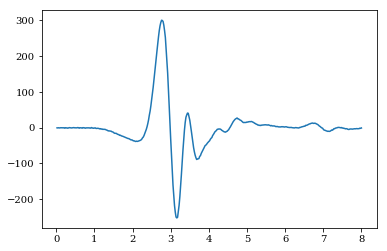

In [11]:
%pylab inline
from scipy import constants
import numpy as np

from numpy import genfromtxt
my_data = genfromtxt('../data/2D/EO_sampling_data.csv')

print(my_data)

for i in range(1, 2):
    plot(my_data[:,0], my_data[:,i])
show()

from WriteBinary import *

Write1DArray(my_data[:,0]*1.0e-12, "../data/2D/time_samples.d", "d")
Write1DArray(my_data[:,1]/np.max(np.abs(my_data[:,1])), "../data/2D/field_samples.d", "d")
Write1DArray(my_data[:,0]*1.0e-12, "../data/2D/time_samples.f", "f")
Write1DArray(my_data[:,1]/np.max(np.abs(my_data[:,1])), "../data/2D/field_samples.f", "f")


Populating the interactive namespace from numpy and matplotlib


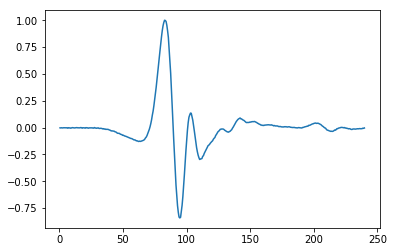

In [1]:
%pylab inline

from ReadBinary import *

time_samples = Read1DArray("../data/2D/time_samples_fdtd.f", "f")
field_samples = Read1DArray("../data/2D/field_samples.f", "f")

plot(time_samples, field_samples)
